In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
import numpy as np

def vectorise_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results

x_train = vectorise_sequences(train_data)
x_test = vectorise_sequences(test_data)

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5058 - accuracy: 0.7872 - val_loss: 0.3776 - val_accuracy: 0.8724
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2962 - accuracy: 0.9035 - val_loss: 0.3158 - val_accuracy: 0.8761
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2164 - accuracy: 0.9282 - val_loss: 0.2782 - val_accuracy: 0.8892
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1723 - accuracy: 0.9420 - val_loss: 0.2942 - val_accuracy: 0.8799
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1381 - accuracy: 0.9566 - val_loss: 0.3325 - val_accuracy: 0.8697
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1155 - accuracy: 0.9635 - val_loss: 0.3415 - val_accuracy: 0.8743
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0973 - accuracy: 0.9707 - val_loss: 0.3139 - val_accuracy: 0.8840
Epoch 8/20
30

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

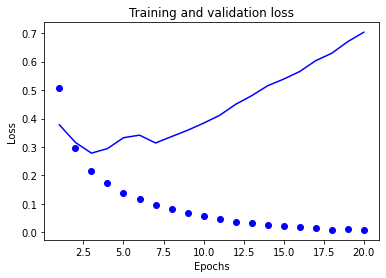

In [10]:
import matplotlib.pyplot as plt 

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training_loss')
plt.plot(epochs, val_loss_values, 'b', label='Validaiton loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

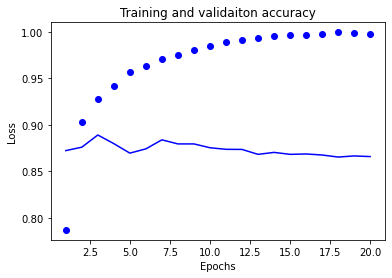

In [11]:
plt.clf()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validaiton acc')
plt.title('Training and validaiton accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()